In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path = './'
files = os.listdir(path)
print(files)

['1.0-20.0-rms.out', '1.0-0.2-rms.out', '1.0-10.0-rms.out', '1.0-30.0-rms.out', '1.0-0.1-rms.out', 'res_rms.ipynb', '1.0-1.0-rms.out', '1.0-5.0-rms.out', '1.0-0.5-rms.out', '1.0-2.0-rms.out']


In [3]:
result=[]
out_files=[]

for file in files:
    if file.endswith('-rms.out') & file.startswith('1.0'):
        # get *-rms.out 2nd column data
        out_files.append(file)
        with open(os.path.join(path, file), 'r') as f:
            lines = f.readlines()
            tmp = []
            for line in lines:
                # add rms to tmp
                tmp.append(np.log10(np.double(line.split()[2])))
            # add tmp to result
            result.append(tmp)
result

[[1.5442541306840103,
  1.4864729852063823,
  1.1346009914416824,
  0.9232507558432513,
  0.7826789725144364,
  0.7095870837131296,
  0.6504881986844481,
  0.6010218735055588,
  0.539821040231776,
  0.4814913584824718,
  0.4475657664849299,
  0.43265186749374307,
  0.4155792670023525,
  0.400940151497827,
  0.3831903938691447,
  0.3675087359722452,
  0.3532871154675401,
  0.34341450253212324,
  0.3179839854531513,
  0.31654692381701954,
  0.2972219584632995,
  0.288072519884971,
  0.28001579054292536,
  0.26847032090093365,
  0.2632572270140662,
  0.24982671208261592,
  0.24119023296982914,
  0.22988141324824898,
  0.2267674048983585,
  0.20587532313764223,
  0.1998072675331994,
  0.19458926162447332,
  0.1881942008437026,
  0.1843364700443419,
  0.18006563198910064,
  0.17738641876445344,
  0.17320084180808767,
  0.17149535336136942,
  0.16988300986642965,
  0.16874490784898186,
  0.16322102671557834,
  0.16177215726134633,
  0.16160754690839674,
  0.16906870288095505,
  0.16052555291

In [4]:
# plot
result[2]

[1.5442541306840103,
 1.486471568395009,
 1.1449662965474914,
 0.9418223834692707,
 0.8110901753007211,
 0.7352698608799818,
 0.6751502680724776,
 0.6124638438870358,
 0.5576130558032346,
 0.502625102208506,
 0.46676829933817643,
 0.4469516924539487,
 0.42894752499173405,
 0.4140151735244606,
 0.4014815325966273,
 0.38583497754035334,
 0.3681473674788922,
 0.3513807464277889,
 0.33858795735561725,
 0.3158591350475337,
 0.30489748811740347,
 0.29656866965175427,
 0.2913111183091288,
 0.27919909566684215,
 0.2708045654074221,
 0.2637567549162729,
 0.2525545025839502,
 0.24084117574546957,
 0.22786357588931075,
 0.22412369544313268,
 0.2137009985734393,
 0.2089060393436781,
 0.2058672128865895,
 0.20337289680417756,
 0.19984838702541455,
 0.1974349464962119,
 0.196935743115919,
 0.19661274802815126,
 0.193461324399443,
 0.19029246980029557,
 0.18877385302232705,
 0.1895015428879217,
 0.1871398411728779,
 0.18522191106799105,
 0.18361144921843242,
 0.1835773007537731,
 0.18289376698604717,

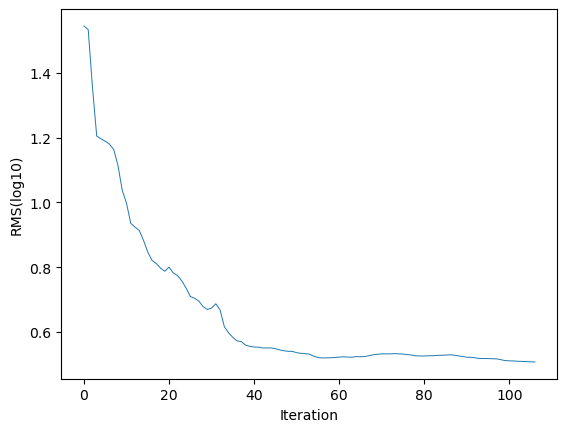

In [5]:
plt.figure()
zero_array=np.zeros(500)
plt.plot(result[1], linewidth=0.7)
plt.xlabel('Iteration')
plt.ylabel('RMS(log10)')
plt.show()

In [6]:
# split seis data weight parameter
seis_data_weight = []
for file in out_files:
    file_tag = np.double(file.split('-')[1])
    seis_data_weight.append(file_tag)
seis_data_weight

[20.0, 0.2, 10.0, 30.0, 0.1, 1.0, 5.0, 0.5, 2.0]

In [7]:
sort_index = np.argsort(seis_data_weight)
sort_index

array([4, 1, 7, 5, 8, 6, 2, 0, 3])

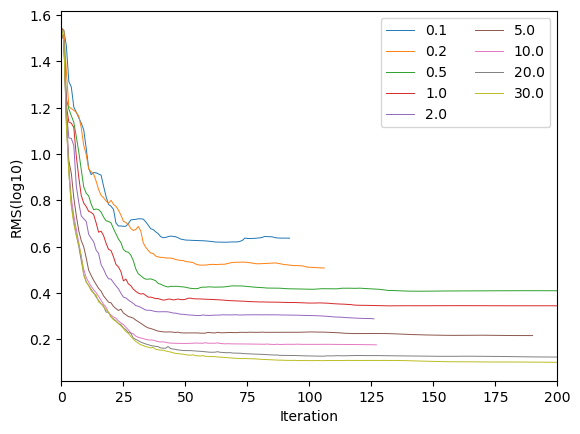

In [8]:
plt.figure()
zero_array=np.zeros(500)
plt.xlim([0,200])
for iter in sort_index:
    plt.plot(result[iter], linewidth=0.7, label=seis_data_weight[iter])
plt.xlabel('Iteration')
plt.ylabel('RMS(log10)')
plt.legend(ncol=2)
plt.show()